<a href="https://colab.research.google.com/github/mahbubcsedu/interviewcoding/blob/main/top50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LC-1 Two sum
A array  of integeris given together with a target integer

### There is obviously a simple solution but cost is $0(n^2)$

In [ ]:
import typing
def two_sum_bruteforce(nums, target: int) -> [int, int]:
  for i in range(len(nums)):
    for j in range(i+1, len(nums)):
      if (nums[i] + nums[j] == target):
        return [i,j] 
  return [-0,-1]

two_sum_bruteforce([2,7,5,10], 15)

[2, 3]

### Using sorting
we can improve cost by sorting the list, but the expection is to return index not the true or false. The cost of sorting $O(nlogn)$ which dictates the timing

In [ ]:
def two_sum_sorting(nums, target: int) -> bool:
  nums.sort()
  i=0 
  j=len(nums)-1
  while(i<j):
    if (nums[i]+nums[j]==target):
      return True
    if nums[i]+nums[j] > target:
      j=j-1
    if nums[i] + nums[j] < target:
      i=i+1
  return False
two_sum_sorting([2,7,5,10], 9)

True

### Using hash
we can store each element to the hash as we iterate over the list, and can try to find target-element from the map. if it exists we can return the item index. But for that, we need to store index as well as the item


In [ ]:
def two_sum_map(nums: [int], target:int)-> [int, int]:
  hash_map={}
  for i in range(len(nums)):
    if(target-nums[i] in hash_map):
      return [hash_map.get(target-nums[i]),i]
    else:
      hash_map[nums[i]] = i
  return [-1,-1]

two_sum_map([2,7,5,10], 9)

[0, 1]

## Spiral order matrix

In [ ]:
from  typing import List
def spiralOrder(matrix: List[List[int]]) -> List[int]:
        spiral_list = []
        m, n = len(matrix), len(matrix[0])
        count, left, right, up, down = 0, 0, len(matrix)-1, 0, len(matrix[0])-1 

        while count < m*n :
            for i in range(left, right+1):
                spiral_list.append(matrix[up][i])
                count = count+1

            # if(left != right):
            for j in range(up+1, down+1):
                print(j, right)
                spiral_list.append(matrix[j][right])
                count = count+1

            if(up != down):
                for k in reversed(range(left, right)):
                    spiral_list.append(matrix[down][k])
                    count = count+1

            if(left != right) :
                for l in reversed(range(up+1, down)):
                    spiral_list.append(matrix[l][left])
                    count = count+1

            left = left+1
            right = right-1
            up = up+1
            down = down-1

        return spiral_list
dd = spiralOrder([[1,2,3],[4,5,6],[7,8,9]])
print(dd)

1 2
2 2
[1, 2, 3, 6, 9, 8, 7, 4, 5]


## Longest palindromic substring

In [ ]:
def longestPalidromicSub(s: str) -> str:
  if s == "":
    return s
  if s== s[::-1]:
    return s

  max_len = 0
  local_len =0
  start, end =0, 0

  for i in range(len(s)):
    len1 = expandAroundCenter(i, i+1, s)
    len2 = expandAroundCenter(i,i, s)
    local_len = max(len1, len2)
    print(local_len)
    if local_len > end-start:
      # print(i)
      start = i - ((local_len-1)//2) # if len is even, like 6, 5/2 = 2, if odd, 5/2=2
      end = i + (local_len//2) # for end it does not need to change as it starts always with the character at that place (s) or ss
      # max_len= local_len
  return s[int(start):int(end+1)]

def expandAroundCenter(left: int, right: int, s: str) -> int:
  length = 0
  # print(left, right)
  # work with an example  sabssbad, if left =2, right=5, len = 5-2 + 1 = 4
  # if its sabsbad, left 2, right is 4, len = 4-2 = 2 + 1
  while (left > 0 and right < len(s) and s[left]==s[right]):
    left -=1
    right +=1
  length=(right-left) -1
  return length 

result = longestPalidromicSub("cbbd")
# assert expandAroundCenter(3,3, "sabsbad") == 5
# assert expandAroundCenter(3,4, "sabssbad") == 6
# result = longestPalidromicSub("sabsbad")
result

0
2
1
1


'bb'

## Zigzag conversion
The main processing here is to find a cycle for numRows.
``` 
A     G
B   F H
C E   I
D     J
```
Here for numRows=4, cycle length is 2*n-2 which is 6, for second row, there will be two items, one is at index 1 and another at $2*n-2-1$, and the next one at $2*n-2-2$

In [ ]:
class Zigzag:
  def convert(self, s: str, numRows: int) -> str:
    if numRows < 2: 
      return s 
    
    cov_str = []
    n = len(s)

    cycle_length= 2*numRows-2

    for cur_row in range(numRows):
      for cur_cycle in range(0, n, cycle_length):
        # print(cur_row+cur_cycle)
        if cur_row+cur_cycle < n:
          cov_str.append(s[cur_cycle+cur_row])

        if (cur_row !=0 and cur_row != numRows-1) and cycle_length+cur_cycle-cur_row < n:
          cov_str.append(s[cycle_length+cur_cycle-cur_row])
    return str(cov_str)
    # return ""

v = Zigzag().convert("PAYPALISHIRING", 4)
print(v)

['P', 'I', 'N', 'A', 'L', 'S', 'I', 'G', 'Y', 'A', 'H', 'R', 'P', 'I']


## Reverse int
The main problem here would be to handle out of bound problem
Algorithm:
* we can remove sign bit
* reverse using digit*10*n for its position
* return 0 if it negative or out of range

In [ ]:
def reverse(x: int)-> int:
  cnt=0
  while x!=0:
    r = x%10
    x=x//10
    cnt = cnt*10+r
  return cnt  
print(reverse(987))
# in python the condition is tough to prove
# rev = max_int/10

789


In [ ]:
def isMatch(s: str, p: str) -> bool:
  if s==p:
    return True
  if not p :
    return not s 
  # print(s,p)
  
  first_char_match = bool(s) and (p[0] == "." or p[0] == s[0]) # in {s[0], '.'}

  if(len(p)>=2 and p[1]=="*"):
     return isMatch(s, p[2:]) or first_char_match and isMatch(s[1:], p)
  else:
     return first_char_match and isMatch(s[1:], p[1:])
  # if(s[0]==p[0]):
  #    return isMatch(s[1:], p[1:])
  # if(p[0]=="*"):
  #    return (isMatch(s[1:], p) or isMatch(s[1:], p[1:]))
  # if(p[0]=="."):
  #    return isMatch(s[:1],p[1:])
  # return False
# print(isMatch("aa","a"))
# print(isMatch("aa","a*"))
# print(isMatch("ab",".*"))
print(isMatch("aab","c*a*b"))


def isMatchD(s: str, p: str) -> bool:
  # will just used the above recursion to store isMatch(s[1:], p[1:]) which can come repeatedly
  memorization = {}
  def dp(t, j):
    if(t, j) not in memorization:
      if j==len(p):
        ans= t==len(s)
      else:
        f_match= t <len(s) and p[j] in {s[t], '.'}
        if j+1 < len(p) and p[1]=='*':
          ans = dp(t, j+2) or f_match and dp(t+1, j)
        else:
          ans = f_match and dp(t+1, j+1)
      memorization[t,j] = ans
    return memorization[t,j]

  return dp(0,0)
print(isMatchD("aab","c*a*b"))  

True
True


## Container with most water


In [ ]:
from typing import List 
def maxArea(height: List[int])-> int:
  left, right = 0, len(height)-1
  max_area=0
  # print()

  while left < right:
    # print(left, right)
    area = (right - left)* min(height[left], height[right])
    max_area = max(max_area, area)
    # print(height[left], height[right], "(left, right)")

    if height[left] < height[right]:
      left = left + 1
      # print(left)
    elif height[left] > height[right]:
      right = right -1
      # print(right)
    else:
      left = left + 1
      right = right -1
      # print(left, right)
  return max_area
  
print(maxArea([1,8,6,2,5,4,8,3,7]))

49


In [ ]:
from typing_extensions import DefaultDict
def threeSum(nums: List[int])-> List[List[int]]:
  # brute force is O(n^3)
  # keep all numbers to hashmap and find 2sum where map contains -2sum O(n) space, O(nlogn) if we sort
  # nums.sort()
  num_map = {nums[i]: i for i in range(0, len(nums))}
  result= set()
  
  for i in range(len(nums)):
    for j in range(i+1, len(nums)):
      two_sum = nums[i] + nums[j]

      idx = num_map.get(-two_sum)
      # print(idx, i, j) 

      if idx:
         if idx > i and idx > j:
           result.add(tuple(sorted((nums[i], nums[j], -two_sum))))
           
  # print(num_map)
  return result 

print(threeSum([-1,0,1,2,-1,-4]))

{(-1, 0, 1), (-1, -1, 2)}


In [ ]:
from typing import List 

class LetterComb:
    def letterCombinations(self, digits: str) -> List[str]:
        if len(digits) == 0: 
          return []
        result=[]
        self.backtrack(digits, 0, [], result)
        return result

    def backtrack(self, digits:str, idx:int, temp_comb:List[str], result:List[str]):

        char_map = {
            '2' : "abc",
            '3' : "def",
            '4' : "ghi",
            '5' : "jkl",
            '6' : "mno",
            '7' : "pqrs",
            '8' : "tuv",
            '9' : "xyz"
        }

        if len(digits) == len(temp_comb):
            result.append(''.join(temp_comb))
            return 

        letter_mapping = char_map[digits[idx]]
        for c in letter_mapping:
                temp_comb.append(c)
                self.backtrack(digits, idx+1, temp_comb, result)
                temp_comb.pop()

v = LetterComb().letterCombinations("23")
print(v)

2
3
3
3
['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


In [ ]:
#  this is brute force algorithm, need better data structure, its LC problem of count smaller after the current number
def countSmaller(nums: List[int]) -> List[int]:
        result=[]
        # min_value = min(nums)
        min_values = 0

        for i, d in enumerate(nums):
          min_values = countNum(d, nums[i:])
          result.append(min_values)
        return result 

def countNum(cur_num, sublist):
        count = 0
        for d in sublist:
          # print(sublist, d, cur_num)
          if d < cur_num:
                count=count+1
        return count 

# print(countSmaller([5,2,6,1]))
# print(countSmaller([-1]))
# print(countSmaller([-1, -1]))
print(countSmaller([0,2,0]))

[0, 1, 0]


## KSum
Two sum is the only thing algorithomically do anything, other than that, we can always run two sums where we are asked to provide sums of more than two elements. So for generic sum or KSum, we will extend the algorithm to deal with any number of sums
 * Look for remaining sum to see whether target//k which is the average number is bigger than the biggest number available
 * Look for sum to see whether target//k is smaller than the smallest number to reach the target. 
 If that is the case, it will not be able to reach. So, its all about pruning

 
 Note: <font color='green'>we can basically apply this if its more than two sum, if the question is 3 sum, just follow 3 sum, if its 4 sum, that means go for kSum or ask at least</font>

In [ ]:
from typing import List
def kSum(nums: List[int], target) -> List[int]:
  
   def kSum(nums, target, k):
     res = []
     
     if not nums:
       return res

     avg_value = target//k

    #  average is low than the smallest, average greater than the biggest
    #  average is bigger than the biggest available to copare, nothing will come out processing that
     if avg_value < nums[0] and nums[-1] <avg_value:
       return res 

    #  recursive algorithm base condition, if its 2 apply optimized algorithm (it could be two pointer, or hash set)
     if k == 2:
        return twoSum(nums, target)
    

     for i in range(len(nums)):
       #for first element, nothing for equal, and avoid if its equal  
       if i==0 or nums[i] != nums[i-1]:
        #  how to make sure that a, b, c and d are unique, use nums[i+1:] array after adding nums[i]
         for subset in kSum(nums[i+1:], target-nums[i], k-1): #each step will converge towards K and target
           res.append([nums[i]]+subset)
     return res 

   def twoSum(nums, target)-> List[int]:
     res = []
     left, right = 0, len(nums)-1
     
     while left < right:
       two_sum = nums[left] + nums[right]
       if two_sum < target:
         left = left + 1
       elif two_sum > target:
         right = right -1
       else:
         res.append([nums[left], nums[right]])
         right = right-1
         left = left+1
        #  if there is no two sum that satisfies the condition will result in returning empty res
     return res 
   
   nums.sort()
   return kSum(nums, target, 4)


nums = [1,0,-1,0,-2,2]
target = 0
print(kSum(nums, target))

print(kSum([1,2,3,4], 6))

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]
[]


# Delete kth note from the end
* will be provided a list (linked list)
* need to delete 2nd from the last node

Two pointer would be helpful

In [ ]:
from typing import Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class DeleteNode:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        p1, p2 = ListNode(), ListNode()
        p1.next=head
        p2.next=head
        temp = p1
        counter = 0
        while n>0:
            n=n-1
            p2 = p2.next
        while p2.next:
            p2= p2.next
            p1 = p1.next
        
        p1.next = p1.next.next
        return temp.next;xt.next
        return head

test_link = ListNode(1, ListNode(2, ListNode(3, ListNode(4, ListNode(5, None)))))

# Think this special case: 
# Input: head = [1], n = 1
# Output: []


res = DeleteNode().removeNthFromEnd(test_link, 2)   
# print(res)
while res:
  print(res.val)
  res = res.next




3
1
2
3
5


## Valid parentheses check 


In [ ]:
from typing import Deque

def isValidParen(s: str) -> bool:

  mapping_left = {
      '(': ')',
      '{' : '}',
      '[' : ']'

  }
  mapping_right = {
      ')': '(',
      '}' : '{',
      ']' : '['
  }

  q = []
  for c in s:
    if len(q) >0 and c in mapping_right and mapping_right[c] == q[-1]:
      q.pop()
    elif c in mapping_left: 
      q.append(c)
    else:
      return False 
  if not q:
    return True 
  return False

# res = isValidParen("{{(()}}")
res = isValidParen("(]")
print(res)

False


### Generate all combination of parentheses
Given n, produce all combination of valid parentheses with length 2*n

This is very interesting backtracking or recursive algorithm, need to draw the tree, and make sure you understand it

In [ ]:
from typing import List
def generateParenthesis(n: int) -> List[str]:
  result = []
  backtrack(n, 0, 0, [], result)
  return result

def backtrack(n, left, right, temp, result):
  if len(temp) == 2*n :
    # temp+")"
    result.append("".join(temp))
    return
  if left < n:
    print(left, right, temp)
    temp.append("(")
    backtrack(n, left+1, right, temp, result)
    temp.pop()
  if right < left:
    print(left, right, temp)
    temp.append(")")
    backtrack(n, left, right+1, temp, result)
    temp.pop()

print(generateParenthesis(2))



2 1 ['(', '(', ')', ')']
2 0 ['(', '(', ')']
1 0 ['(', '(']
2 1 ['(', ')', '(', ')']
1 1 ['(', ')', '(']
1 0 ['(', ')']
0 0 ['(']
['(())', '()()']


## Merge k sorted list (linked)

In [ ]:
from contextlib import nullcontext
from typing import List, Optional
import heapq

class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next 

def mergeKLists(lists: List[Optional[ListNode]]) -> Optional[ListNode]:
  head = ListNode()
  temp = head 
  # for each list, find the head and min of  them, 
  # add min to the new list
  # move head of that list to next and keep all other intact
  heap = []
  for i in range(len(lists)):
    if lists[i]:
      heapq.heappush(heap, (lists[i].val, i))
      lists[i]=lists[i].next
  
  while heap:
    smallest_entry = heapq.heappop(heap)
    entry_value = smallest_entry[0]
    list_id = smallest_entry[1]

    temp.next = ListNode(entry_value, None)
    temp = temp.next
    
    if lists[list_id]: 
      heapq.heappush(heap, (lists[list_id].val, list_id))
      lists[list_id] = lists[list_id].next 

  return head.next
  # print(heap)


lists = [ListNode(5, ListNode(8, None)), ListNode(2, ListNode(10, None)), ListNode(3, ListNode(6, None))]


merged_list = mergeKLists(lists)

while merged_list:
  print(merged_list.val)
  merged_list = merged_list.next 


2
3
5
6
8
10


## Swap every two adjucent nodes


In [ ]:
from typing import Optional 

class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next
def swapPairs(head: Optional[ListNode]) -> Optional[ListNode]:
    if not head or not head.next:
          return head

    prev_head = ListNode()
    
    first_head = prev_head 
    cur_head = head
    print(cur_head.next)

    

    while cur_head and cur_head.next:
        next_head = cur_head.next.next 
        temp = cur_head.next 
        prev_head.next = temp 
        cur_head.next = None
        temp.next = cur_head
        # cur_head.next.next = cur_head 
        cur_head = next_head
        prev_head = temp.next

    if cur_head:
      prev_head.next=cur_head

    return first_head.next 

linked_list = ListNode(5, ListNode(6, ListNode(7, ListNode(8, ListNode(9, ListNode(10, None))))))  
# test_2 = ListNode()

l= swapPairs(linked_list)


while l:
  print(l.val)
  l = l.next

# l2 = swapPairs(l)

# test_2 = ListNode(1, ListNode(2, ListNode(3, None)))
# l2 = swapPairs(test_2)
# while l2:
#   print(l2.val)
#   l2 = l2.next

6
5
8
7
10
9


## <font color="green"> LC-25: </font> Reverse in K group


In [ ]:
from typing import Optional 
# Question need to ask
# 1. what happens to last segment which is less than k?
def reverseKGroup(head: Optional[ListNode]) -> Optional[ListNode]:
  pass


# my advice is always use the paper or drawing to get what needs to be done with three or two pointers

def reverseKNodes(start, finish, k, head):
  temp = head

  while temp != start:
    temp = temp.next
    k = k+1
  
  prev_head = start 

  tail = start.next.next 
  h= start.next 

  while k >0 and tail.next:
    next_head = tail.next 
    tail.next = h 
    h.next = prev_head 
    prev_head = h 
    h = tail
    tail = next_head 
  
  prev_head.next = tail 

  return head 



class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next

def reverseLinkedList(head, prev_node=None):
  tail = head.next
  # prev_node = None
  # first_node = prev_node 
  # [1, 2, 3, 4] [0]
  # [0,1 2, 3, 4]

  while tail:
    next_head = tail.next
    tail.next = head 
    head.next = prev_node
    prev_node = head 
    head = tail
    tail = next_head 
  return head 

linked_list = ListNode(5, ListNode(6, ListNode(7, ListNode(8, ListNode(9, ListNode(10, None))))))  
# test_2 = ListNode()

l= reverseLinkedList(linked_list)

while l:
  print(l.val)
  l = l.next

10
9
8
7
6
5


In [ ]:
class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next
    
class LinkedList:
  def __init__(self, head=None):
    self.head=head

  def __str__(self):
    res = ""

    ptr = self.head 
    while ptr:
      res = res + "," + ptr.val 
      ptr = ptr.next
    
    res.strip(',')

    if len(res):
      return  "[" + res + "]"
    else:
      return "[]"
    


def reverseKNodes(start, k, head):
  temp = head

  while temp != start:
    temp = temp.next
    k = k+1
  
  prev_head = start 

  tail = start.next.next 
  h= start.next 

  while k >0 and tail.next:
    next_head = tail.next 
    tail.next = h 
    h.next = prev_head 
    prev_head = h 
    h = tail
    tail = next_head 
  
  prev_head.next = tail 

  return head 

linked_list = ListNode(5, ListNode(6, ListNode(7, ListNode(8, ListNode(9, ListNode(10, None))))))  
res = reverseKNodes(2, 2, linked_list)

while res:
  print(res.val)
  res =res.next 



  


## LC solution 
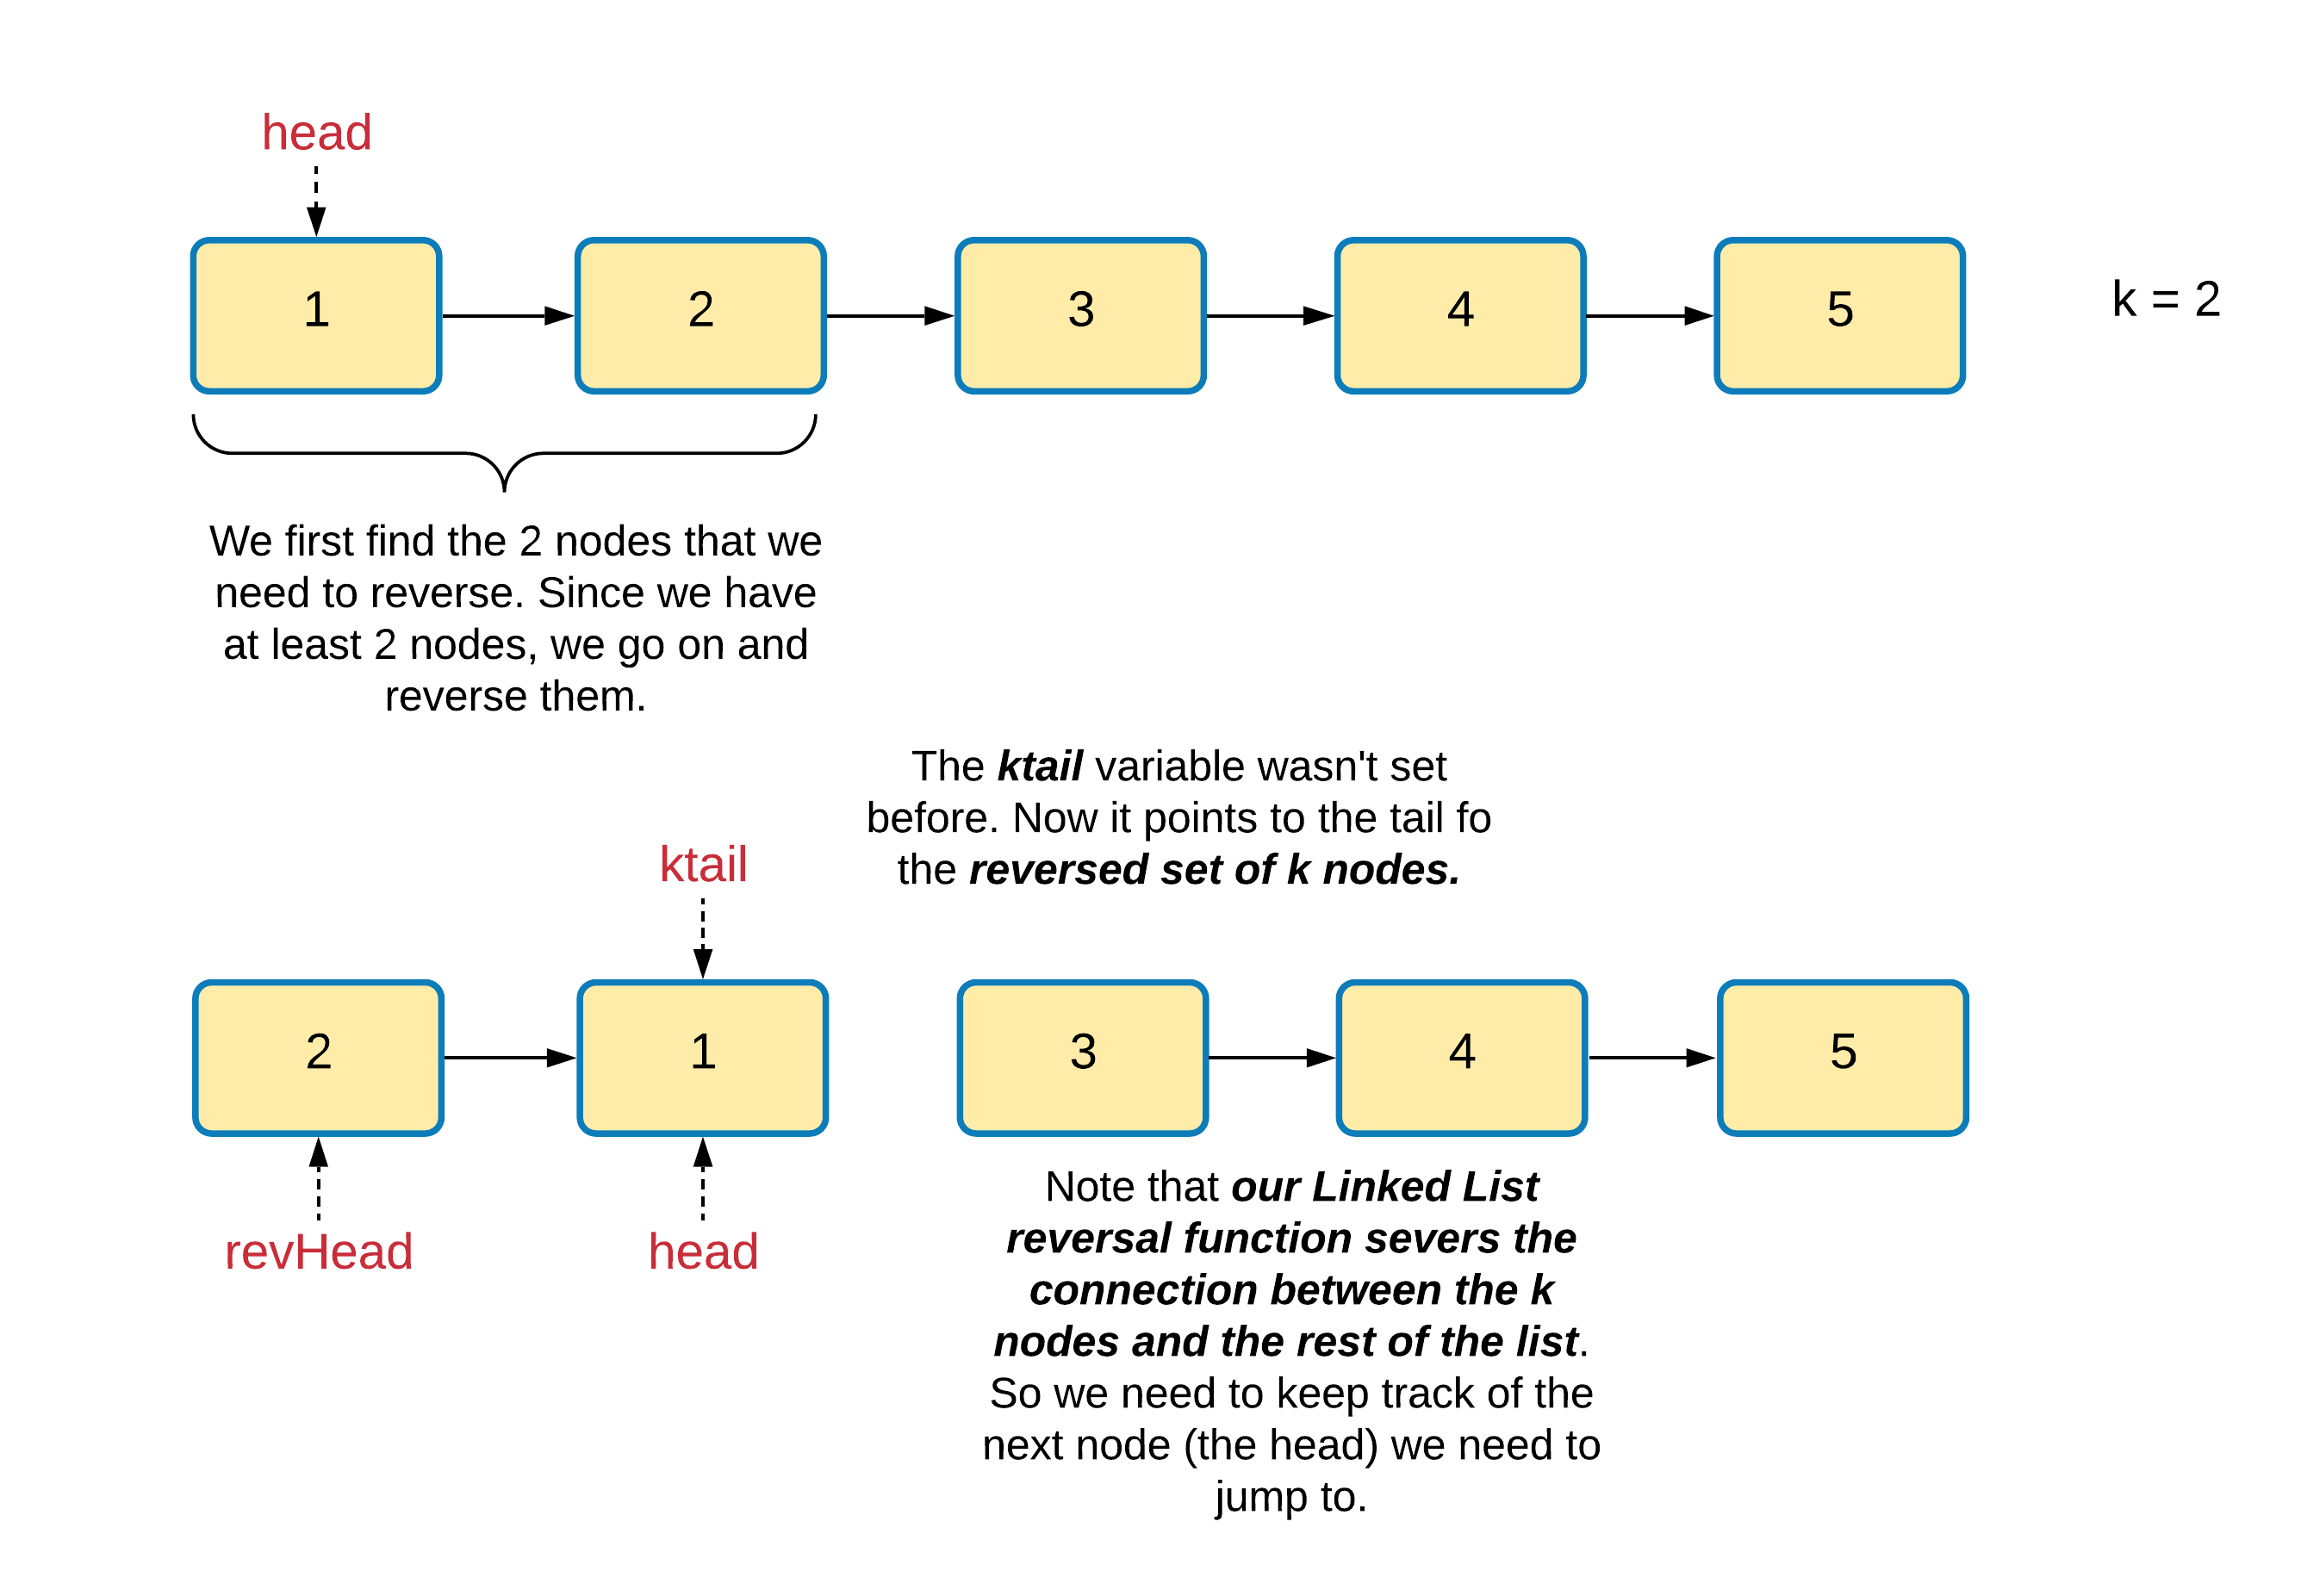

In [ ]:
class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next
    
def reverseLinkedList(head: Optional[ListNode], k: int) -> Optional[ListNode]:
  new_head, head_ptr = None, head

  while k:
    next_node = head_ptr.next # None [1,2,3], ptr->1, next_node ->2  
    # ptr now points to new head, for initial its None 
    head_ptr.next = new_head 
    # move new_head to point to 1 instead of previous one (intially None)
    new_head = head_ptr 
    # move ptr to next node
    head_ptr = next_node 
    #  do until k
    k = k-1 
    # the resulting linked list may contains node after new_head, but will only process k 

  return new_head   

def reverseInKGroups(head: Optional[ListNode], k: int) -> Optional[ListNode]:
  # for this, we have to keep track of head and tail
  ptr = head
  group_head = head 
  ktail = None 
  new_head = None 

  # will continue until visited all nodes in the linked list  
  while ptr:
    processed = 0
    ptr = head 
    
    while processed < k and ptr:
      ptr = ptr.next 
      processed +=1

    if processed == k:
      rev_head = reverseLinkedList(head, k)  # [2,1,3,4], return 1 of 2<-1<-head

      # if its first block, then new_head will be the rev_head
      if not new_head:
        new_head = rev_head 
      # if not first block, it will have ktail
      if ktail:
        ktail.next = rev_head 
    
      ktail = head  #after reverse, 1->2 to 2->1<-ktail, next batch 4<-3
      head = ptr 
  
  if ktail:
    ktail.next = head 
  
  return new_head if new_head else head 


linked_list = ListNode(5, ListNode(6, ListNode(7, ListNode(8, ListNode(9, ListNode(10, None))))))  
res = reverseInKGroups(linked_list, 2)

while res:
  print(res.val)
  res =res.next 

6
5
8
7
10
9


## First occurance of a string in another string

In [ ]:
def strStr(haystack: str, needle: str) -> int:
  hlen, nlen = len(haystack), len(needle) 
  if hlen < nlen:
    return -1
  
  first_occurance = -1

  for i in range(0, hlen-nlen+1):
    left=i
    if haystack[left:left+nlen] == needle:
      first_occurance = left
      break
      
  return first_occurance 



print(strStr("saddaysads", "sad"))

0


## Robin Karp string matching
  example of a reduce function


```python
  from functools import reduce
  BASE=2
  reduce(lambda h, c: h*BASE + c, [1,2,3], 0)
  (0*2+1)+(1x2+2)+(4x2+3)+0=11
```



In [ ]:
from functools import reduce
def strStrRobinKarp(haystack: str, needle: str) -> int:
  # this is hash based comparison
  hlen, nlen = len(haystack), len(needle)

  if hlen < nlen:
    return -1
  
  # Generating hash code for both of the string

  # ord(ch) - returns integer value for a unicode character

  BASE = 26
  h_hash = reduce(lambda h, c: h*BASE + ord(c), haystack[:nlen], 0)
  n_hash = reduce(lambda h, c: h*BASE + ord(c), needle, 0)
  print(h_hash, n_hash)

  power_s = BASE**max(nlen-1, 0) # BASE^|s-1|, make sure its len(n)-1


  for i in range(nlen, hlen):
    if h_hash==n_hash and haystack[i-nlen:i] == needle:
      return i-nlen
    
    print(haystack[i-nlen], i-nlen)
    h_hash -= ord(haystack[i-nlen]) * power_s #remove first character 
    h_hash = h_hash * BASE + ord(haystack[i]) #add another at the end, to us rolling hash

    print(h_hash, n_hash)


  if h_hash == n_hash and haystack[-nlen:]==needle:
    return hlen-nlen

  return -1


# test code 

res = strStrRobinKarp("ssssadddd", "sad")
print(res)



80845 80362
s 0
80845 80362
s 1
80827 80362
s 2
80362 80362
3


In [ ]:
from functools import reduce
BASE=2

reduce(lambda h, c: h*BASE + c, [1,2,3], 0)
(0*2+1)+(1x2+2)+(4x2+3)+0=11

11

# Divide integers
You cannot use bigger type than int, like int int or other thing. So, it is testing basically knowledge on how to tackle low level operation with limited size

In [ ]:
def divide(dividend: int, divisor: int) -> int:


  if dividend == divisor:
    return 1
  if divisor == 1:
    return dividend

  if divisor == -1:
    return 2147483647 if -dividend == 2147483648 else -dividend

  negative = (dividend < 0) ^  (divisor < 0)
  
  dividend = -dividend if dividend <0 else dividend
  divisor = -divisor if divisor <0 else divisor
  
  

  temp =divisor
  res = 0

  while dividend > divisor:
    count =1
    
    while dividend > temp:
        temp = temp <<1
        count = count <<1
        # print(count, temp)
    close_num = temp >> 1
    count = count >> 1
    res = res + count
    dividend = dividend - close_num
    temp=divisor
  return -res if negative else res 

print(divide(-2147483648, -1))
print(divide(-2147483648, 2)) # this is also not able to handle

# need to read leetcode solution as this is very use case specific problem


2147483647


## <font color="green" > LC </font> substring with concatenation of all words
Clarification
*  <b> barfoothefoobarman </b> contains bar and foo and provided array is $["bar", "foo"]$ 

In [ ]:
# brute force
# sort concatenated words
# for each position, sort and search (n klogk)
def findSubstring(s: str, words: List[str])-> List[int]:
